### 1번

다음 관계를 증명하고, R 프로그램의 난수를 이용하여 히스토그램을 그리고 이를 바탕으로 관계가 성립함을 보이시오.

(1) X ~ Bin(n, p) 의 확률표본일 때, n이 커지면서 <img src="https://latex.codecogs.com/svg.image?\frac{(X-np)^2}{np(1-p)}\sim\chi^2(1)">

#### 풀이 1-1) 관계 증명하기
- 자유도가 1인 카이제곱분포는 평균이 0이고, 표준편차가 1인 표준정규분포를 Z라고 할 때, Z의 제곱의 분포이다.
- X가 자유도 n, 성공확률 p인 이항분포일 때, X의 기댓값 E(X)=np, 분산 Var(X)=np(1-p)이다.
- <img src="https://latex.codecogs.com/svg.image?Z=\frac{X-np}{\sqrt{np(1-p)}}"> 이라고 하면, X의 평균이 np이고, 분산이 np(1-p) 일 때, Z의 평균은 0, 분산은 1이 된다.
- Z의 제곱을 구하면 <img src="https://latex.codecogs.com/svg.image?Z^2=\frac{(X-\mu)^2}{\sigma^2}=\frac{(X-np)^2}{np(1-p)}"> 이다.
- 그리고 n의 값이 큰 경우 중심극한정리에 따라서 이항분포는 정규분포에 근사하게 된다.
- 따라서, <img src="https://latex.codecogs.com/svg.image?\frac{(X-np)^2}{np(1-p)}\sim\chi^2(1)">이 성립한다.

#### 풀이 1-2) R 프로그램으로 히스토그램 그리기

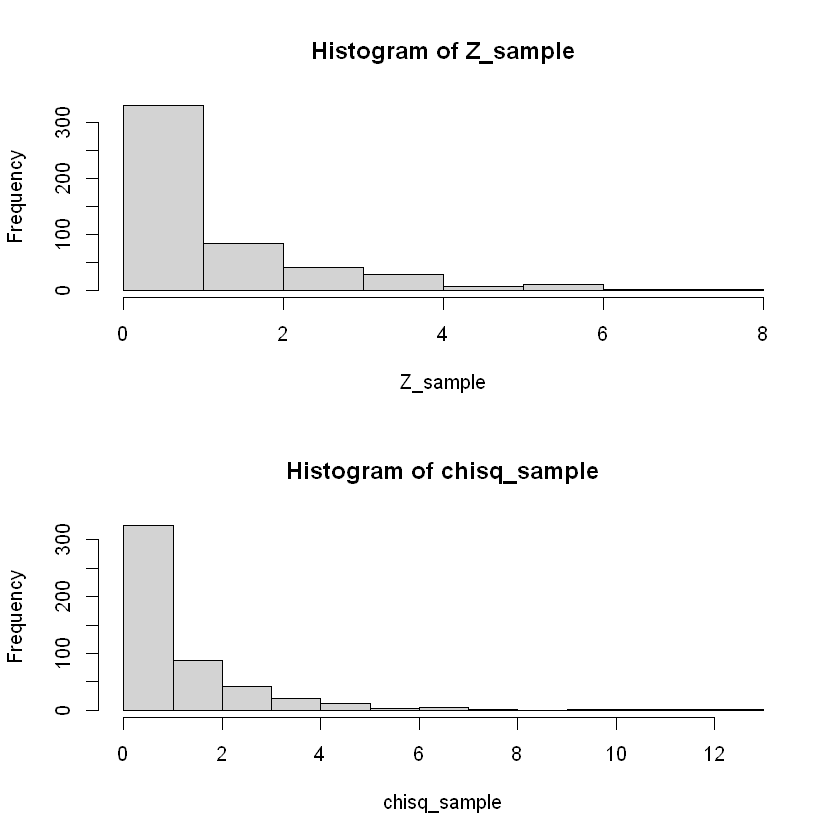

In [27]:
par(mfrow=c(2,1))

# 이항분포 B(n,p)의 히스토그램 그리기
sample_size = 500
n = 100000
p = 0.5

X_sample = rbinom(sample_size, size=n, prob=p)
Z_sample <- (X_sample - n*p)^2 / (n*p*(1-p))
hist(Z_sample)

# 자유도가 1인 카이제곱분포의 히스토그램 그리기
chisq_sample = rchisq(sample_size, df=1)
hist(chisq_sample)

두 그래프가 거의 동일한 형태이므로 <img src="https://latex.codecogs.com/svg.image?\frac{(X-np)^2}{np(1-p)}\sim\chi^2(1)">이 성립한다고 할 수 있다.

(2) <img src="https://latex.codecogs.com/svg.image?X_1,\cdots,X_n\sim&space;Uniform(0,1)"> 의 확률표본이고, <img src="https://latex.codecogs.com/svg.image?X_{(1)}\leq&space;X_{(2)}\leq\cdots\leq&space;X_{(n)}"> 를 순서통계량이라고 할 때, n이 커지면서 <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})\sim&space;Exp(1)">

#### 풀이 2-1) 관계 증명하기

- 균등분포(0,1)의 확률밀도함수는 <img src="https://latex.codecogs.com/svg.image?f(x)=\begin{cases}1,&0\leq&space;x\leq&space;1\\0,&x<0\;\;or\;\;x>1\end{cases}"> 이고,
- 누적분포함수는 <img src="https://latex.codecogs.com/svg.image?F(x)=P(X\leq&space;x)=\int_{0}^{x}1dt=x"> 이다.
- 그리고 <img src="https://latex.codecogs.com/svg.image?X_{(1)}\leq&space;X_{(2)}\leq\cdots\leq&space;X_{(n)}"> 이므로, <img src="https://latex.codecogs.com/svg.image?F_{X_{(n)}}(x)=P(X_{(n)}\leq&space;x)=x^n">이다. (0≤x≤1)

- <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})">의 누적분포함수는 다음과 같이  표현할 수 있다.
  - <img src="https://latex.codecogs.com/svg.image?F_{n(1-X_{(n)})}(y)=P(n(1-X_{(n)})\leq&space;y)">
  - 여기서 <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})\leq&space;y\Leftrightarrow&space;X_{(n)}\geq&space;1-\frac{y}{n}">을 이용하면,
  <img src="https://latex.codecogs.com/svg.image?F_{n(1-X_{(n)})}(y)=P(n(1-X_{(n)})\leq&space;y)">
  <img src="https://latex.codecogs.com/svg.image?=P(X_{(n)}\geq&space;1-\frac{y}{n})=1-P(X_{(n)}<1-\frac{y}{n})=1-F_{X_{(n)}}(1-\frac{y}{n})">
  <img src="https://latex.codecogs.com/svg.image?=1-(1-\frac{y}{n})^n">

- <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})">의 누적분포함수를 미분하면 확률밀도함수를 구할 수 있다.
  - <img src="https://latex.codecogs.com/svg.image?f_{n(1-X{(n)})}(y)=F_{n(1-X{(n)})}(y)\frac{d}{dy}=(1-(1-\frac{y}{n})^n)\frac{d}{dy}">
  <img src="https://latex.codecogs.com/svg.image?=(1-\frac{y}{n})^{n-1}">

- n이 충분히 커지면 다음과 같은 식이 성립한다.
  - <img src="https://latex.codecogs.com/svg.image?\lim_{n\to\infty}f_{n(1-X{(n)})}(y)=\lim_{n\to\infty}(1-\frac{y}{n})^{n-1}=e^{-y}">

- 지수분포 Exp(λ)의 확률밀도함수는 <img src="https://latex.codecogs.com/svg.image?f(x)=\lambda&space;e^{-\lambda&space;x}">인데, λ=1을 대입하면 두 식이 같아진다.
- 따라서, n이 커지면 <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})\sim&space;Exp(1)"> 임을 확인할 수 있다.

#### 풀이 2-2) R 프로그램으로 히스토그램 그리기


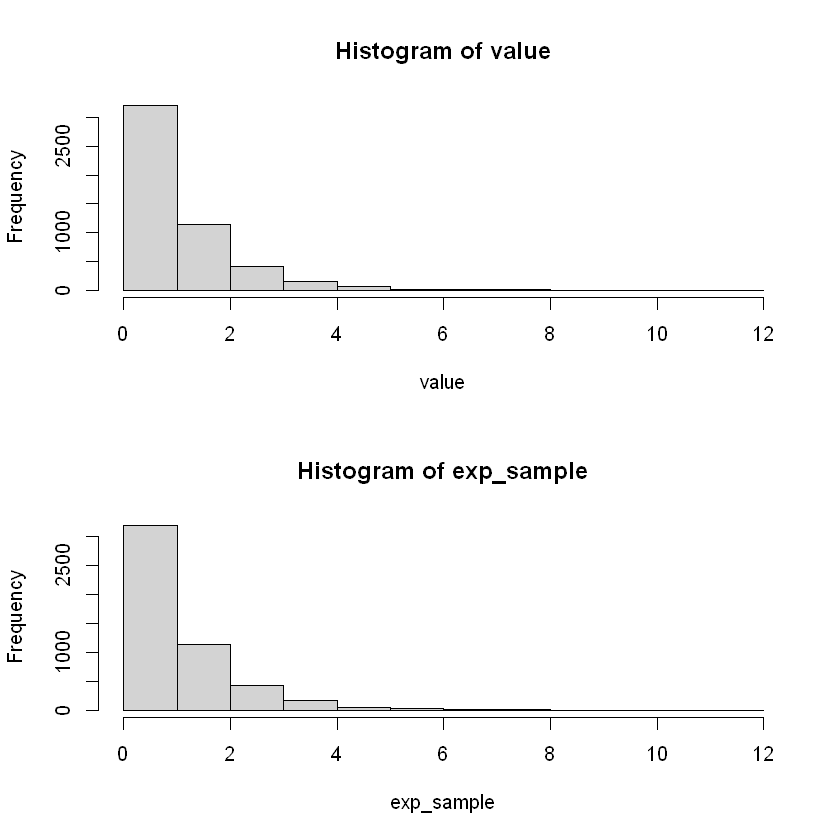

In [46]:
par(mfrow=c(2,1))
n=5000
value = numeric(n)

for(i in 1:n) {
    uni_sample = runif(n)
    max_value = max(uni_sample)
    value[i] = n*(1-max_value)
}

hist(value)

exp_sample = rexp(n)
hist(exp_sample)

두 그래프가 동일한 형태이므로 <img src="https://latex.codecogs.com/svg.image?n(1-X_{(n)})\sim&space;Exp(1)"> 임을 확인할 수 있다.